# Dogs Breeds Competition
#### Author: Anukool Purohit

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/RuffBreeds/"
sz = 224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
os.listdir(PATH)

['train.zip',
 'sample_submission.csv',
 'test',
 'labels.csv.zip',
 'validationSetCreator.py',
 'sample_submission.csv.zip',
 'labels.csv',
 'valid',
 'models',
 'train',
 'filesorter.py',
 'tmp',
 'test.zip']

In [8]:
categories = os.listdir(f'{PATH}valid')
categories[:5]

['boston_bull',
 'maltese_dog',
 'leonberg',
 'miniature_schnauzer',
 'walker_hound']

In [9]:
files = os.listdir(f'{PATH}valid/{categories[0]}')[:5]
files

['240ce7dee9610547cad87c92fcff7dbb.jpg',
 'aa7d9f08fc9ac1d45117848137adce9c.jpg',
 'c1e854371a2316fc28ccb4cb5527c478.jpg',
 '65c0f97251e14cfddda723b209114f80.jpg',
 'ae8693b4868b1744be1fefb328a8a486.jpg']

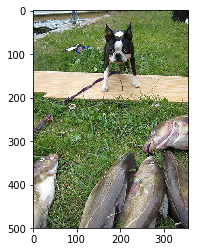

In [10]:
img = plt.imread(f'{PATH}valid/{categories[0]}/{files[0]}')
plt.imshow(img)

In [11]:
img[:4,:4]

array([[[224, 246, 255],
        [198, 220, 234],
        [184, 206, 220],
        [184, 206, 220]],

       [[125, 147, 161],
        [140, 162, 176],
        [173, 195, 209],
        [192, 214, 228]],

       [[164, 186, 200],
        [153, 175, 189],
        [153, 175, 189],
        [154, 176, 190]],

       [[208, 229, 246],
        [192, 213, 230],
        [189, 210, 227],
        [191, 212, 229]]], dtype=uint8)

In [12]:
arch = resnet34
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [13]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [14]:
ims = np.stack(get_augs() for i in range(6))

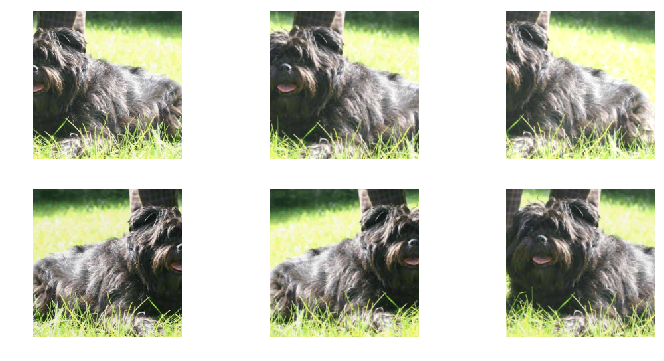

In [15]:
plots(ims, rows=2)

In [16]:
data = ImageClassifierData.from_paths(PATH,tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute = True)

In [17]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▉ | 126/141 [00:03<00:00, 41.31it/s, loss=17.8]


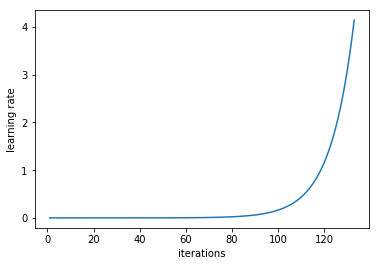

In [18]:
learn.sched.plot_lr()

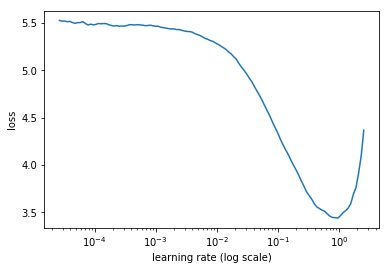

In [19]:
learn.sched.plot()

In [36]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch, data, precompute= True)
learn.fit(0.1,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.198117   0.76567    0.765899  
    1      0.789219   0.696798   0.8125                      



[0.6967983, 0.8125]

In [37]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [38]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch,data, precompute = False)
learn.fit(0.1,4, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.129985   0.589855   0.813596  
    1      0.864324   0.557421   0.8125                      
    2      0.754036   0.542685   0.825932                    
    3      0.715124   0.532829   0.82977                     



[0.5328285, 0.8297697368421053]

In [39]:
learn.unfreeze()

In [31]:
lr=np.array([1e-3,1e-2,1e-1])

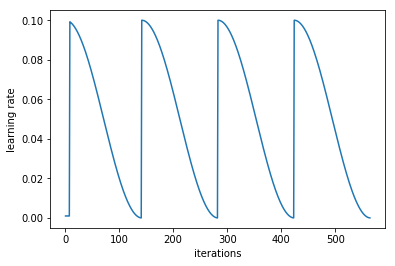

In [40]:
learn.sched.plot_lr()

In [41]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 76%|███████▌  | 107/141 [00:56<00:17,  1.91it/s, loss=3.22]

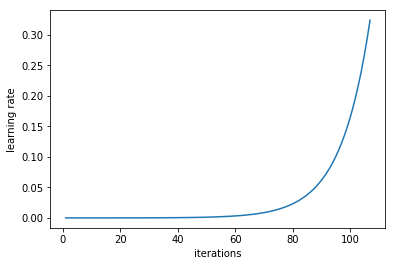

In [42]:
learn.sched.plot_lr()

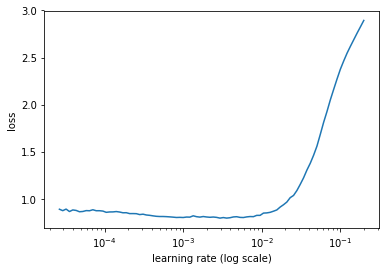

In [43]:
learn.sched.plot()

In [44]:
lr=np.array([1e-5,1e-4,1e-3])

In [50]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.627387   0.554642   0.829221  
    1      0.613397   0.54435    0.828947                    
    2      0.609257   0.534045   0.833882                    
    3      0.599433   0.528082   0.832511                    
    4      0.587037   0.521404   0.832237                    
    5      0.559265   0.516746   0.837445                    
    6      0.571908   0.517689   0.835526                    



[0.5176894, 0.8355263157894737]

In [51]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [52]:
accuracy_np(probs,y)

0.855